In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [58]:
mu, sigma = 0, 2 # mean and standard deviation

# get 10000 examples from a normal distribution
s = np.random.normal(mu, sigma, 10000)

In [59]:
# What are the first 10 values
s[:10]

array([ 2.18084608,  0.84318693,  1.5679882 ,  1.94043925,  1.29241861,
       -2.50745234,  0.52308071, -2.04719907,  1.34056151, -0.45770328])

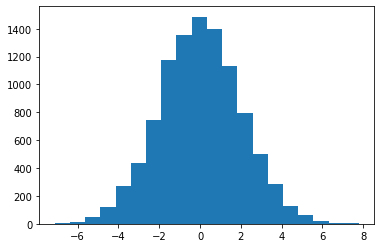

In [60]:
# Let's go look at them in a graph

plt.hist(s, bins=20)
plt.show()

In [61]:
# True variance
np.var(s)

3.983596677863245

In [62]:
# A function to calcate sigma_mean
def sigma_mean(sample, x_bar):
    total = 0
    for x in sample:
        diff = x - x_bar
        total += diff **2
    # 1 / N
    return (1 / len(sample)) * total

# A function to calcate bessel_mean
def bessels(sample, x_bar):
    total = 0
    for x in sample:
        diff = x - x_bar
        total += diff **2
    # 1 / (N - 1)
    return (1 / (len(sample) - 1)) * total

In [68]:
# What are we going to do?
# for an individual sample, no guarantees about if
# sigma_mean or sigma_bessel is closer to the true variance
# BUT, what if we calculate these for a thousand samples?



# calculate sigma mean and bessel's correction
mean_vars = []
bessels_vars = []
# take 1000 samples
for i in range(1000):
    # each sample has 4 numbers
    sample = [random.choice(s) for x in range(4)]
    # calculate sigma mean
    sample_mean = np.average(sample)
    # (x_i - bar x)^2 
    sigma_mean_val = sigma_mean(sample, sample_mean)
    bessels_val = bessels(sample, sample_mean)
    mean_vars.append(sigma_mean_val)
    bessels_vars.append(bessels_val)

In [69]:
# true variance: 
# 3.983596677863245


# with 1000 samples of size 4:
# sigma mean: 3.04516782016406
# bessel's correction: 4.060223760218746


# with 1000 samples of size 40:
# sigma mean: 3.8763540670238092
# bessel's correction: 3.975747761050061

# uncorrected
print("sigma mean:", np.average(mean_vars))
# bessel's correction
print("bessel's correction:", np.average(bessels_vars))

sigma mean: 3.04516782016406
bessel's correction: 4.060223760218746
